<a href="https://colab.research.google.com/github/valesierrai/Integracion-de-Datos-y-Prospectiva/blob/main/Reto_Parcial_2_VSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Reto Parcial 2: Lógica Borrosa - Integración de Datos**



*   De acuerdo con la base de datos Perdida de Productividad en Cultivos de Palma, llevar a cabo el siguiente procedimiento:
Para la base de Datos Observados, llevar a cabo un proceso de gestión de las pérdidas para cuatro (4) niveles de gestión, de acuerdo con la matriz de impacto definida en el curso: 1:1,1:2,1:3,1:4. Es importante para las distribuciones de pérdida que arrojan estas gestiones, hacer una análisis de las variables de los diferentes indicadores que arroja función describe(), así como el coeficiente de asimetría, y el Opeartional Value at Risk (OpVar) o pérdida extrema. Es importante mencionar, que estos indicadores muestran la prospectiva del riesgo frente a la implementación de diferentes matrices de gestión, con el fin de mitigar las pérdidas asociadas con las operaciones agrícolas.
*   Tomando como base de referencia los Datos Observados, llevar a cabo la integración de los datos para cada una de las cuatro (4) fincas que posee la base de datos (Finca 1, Finca 2, Finca 3, Finca 4). Para esta integración se sugiere un nivel de integración del 99%. Es importante analizar los datos y las variaciones para las métricas que arroja función describe() en python. Es importante analizar igualmente, las variaciones experimentadas por los coeficientes de Asimetría y el OpVar para antes y despues de la integración de los datos.
Para los casos anteriores, es importante gráficar las funciones de que caracterizan la distribución de pérdidas para cada nivel de gestión, y para cada proceso de integración.

##0. Se cargan las líbrerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

from scipy.stats import skew #Coeficiente de Asimetría
from scipy.stats import kurtosis #Kurtosis

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Cargamos y Organizamos las Bases de Datos (Archivo de Trabajo)

In [ ]:
def cargar_y_limpiar_datos(x):
  nxl = '/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/3. Perdida Productividad_Zonas(I) (1).xlsx'
  df = pd.read_excel(nxl, sheet_name=x)
  df = df.dropna()
  df= np.array(df[['Frecuencia','Severidad']])
  return df

###1.1. Datos Internos

In [ ]:
XDBo = cargar_y_limpiar_datos(1)
XDBo

###1.2. Datos Externos

In [ ]:
#Cargamos los datos de la Finca 1
XDBe1 = cargar_y_limpiar_datos(3)
XDBe1

In [ ]:
#Cargamos los datos de la Finca 2
XDBe2 = cargar_y_limpiar_datos(5)
XDBe2

array([[ 8.00000000e+01,  1.03285403e+05],
       [ 9.50000000e+01,  1.24543811e+05],
       [ 5.40000000e+01,  1.01070351e+05],
       [ 4.40000000e+01,  1.63620052e+05],
       [ 8.80000000e+01,  1.21550520e+05],
       [ 9.90000000e+01,  7.60663450e+04],
       [ 8.00000000e+00,  1.24724172e+05],
       [ 4.20000000e+01,  2.17723390e+05],
       [ 8.30000000e+01,  1.90626384e+05],
       [ 3.70000000e+01,  1.03036498e+05],
       [ 6.80000000e+01,  1.39961879e+05],
       [ 5.40000000e+01,  3.35313624e+04],
       [ 8.00000000e+01,  4.86814058e+04],
       [ 3.10000000e+01,  4.38149364e+04],
       [ 1.50000000e+01,  8.05954694e+04],
       [ 3.00000000e+00,  7.02571066e+04],
       [ 9.00000000e+01,  3.93212377e+04],
       [ 2.10000000e+01,  7.20518157e+04],
       [ 4.00000000e+01, -1.40480390e+05],
       [ 2.80000000e+01,  2.36705221e+05],
       [ 2.80000000e+01,  2.39719749e+05],
       [ 8.10000000e+01, -4.23075713e+04],
       [ 9.10000000e+01,  3.09966344e+04],
       [ 2.

In [ ]:
#Cargamos los datos de la Finca 3
XDBe3 = cargar_y_limpiar_datos(7)
XDBe3

array([[ 1.70000000e+01,  1.08116632e+05],
       [ 6.10000000e+01,  1.25293482e+05],
       [ 9.30000000e+01,  7.96276526e+04],
       [ 4.10000000e+01,  1.44882743e+05],
       [ 4.70000000e+01,  1.62232025e+05],
       [ 4.20000000e+01,  8.00501751e+04],
       [ 5.70000000e+01,  1.17394993e+05],
       [ 8.10000000e+01,  2.37483811e+05],
       [ 7.70000000e+01,  2.16103945e+05],
       [ 5.00000000e+00,  1.42378223e+05],
       [ 9.70000000e+01,  1.16956050e+05],
       [ 8.90000000e+01,  4.16286491e+04],
       [ 5.80000000e+01,  4.92297064e+04],
       [ 5.80000000e+01,  3.54570985e+04],
       [ 5.90000000e+01,  7.01860704e+04],
       [ 3.40000000e+01,  7.68197082e+04],
       [ 2.80000000e+01,  4.14232435e+04],
       [ 7.40000000e+01,  1.03539265e+05],
       [ 1.00000000e+02, -1.61483565e+05],
       [ 2.20000000e+01,  2.22996792e+05],
       [ 6.80000000e+01,  2.39963405e+05],
       [ 1.60000000e+01, -3.76004375e+04],
       [ 3.80000000e+01,  3.35733322e+04],
       [ 8.

In [ ]:
#Cargamos los datos de la Finca 4
XDBe4 = cargar_y_limpiar_datos(9)
XDBe4

array([[ 1.80000000e+01,  1.06211977e+05],
       [ 4.90000000e+01,  1.00704345e+05],
       [ 1.20000000e+01,  9.57834078e+04],
       [ 3.60000000e+01,  1.73230107e+05],
       [ 3.20000000e+01,  1.15946132e+05],
       [ 7.20000000e+01,  8.78135074e+04],
       [ 9.40000000e+01,  1.07709750e+05],
       [ 2.30000000e+01,  2.04839846e+05],
       [ 4.70000000e+01,  2.12477699e+05],
       [ 4.00000000e+01,  1.24131781e+05],
       [ 1.20000000e+01,  1.39051824e+05],
       [ 4.10000000e+01,  3.28267015e+04],
       [ 5.00000000e+00,  5.55982844e+04],
       [ 7.40000000e+01,  4.15295102e+04],
       [ 8.50000000e+01,  9.35224904e+04],
       [ 7.10000000e+01,  5.81325803e+04],
       [ 6.60000000e+01,  3.41710174e+04],
       [ 2.20000000e+01,  8.66713529e+04],
       [ 3.50000000e+01, -1.86309567e+05],
       [ 4.20000000e+01,  1.97019106e+05],
       [ 5.50000000e+01,  2.15115753e+05],
       [ 5.60000000e+01, -4.44915823e+04],
       [ 6.90000000e+01,  3.11891138e+04],
       [ 5.

##2. Proceso de Clústerización de las Variables - Datos Originales

In [ ]:
np.random.seed(42)
NC=5

def clusterizacion_frecuencia_severidad(XDB):
  #1. Clusterización de Frecuencia
  mkmf = KMeans(n_clusters=NC, init='random',random_state=42)
  mkmf.fit(XDB[:,0].reshape(-1,1))
  XCf = mkmf.cluster_centers_

  #Los organizamos de menor a mayor
  XCf = np.array(sorted(XCf))

  #Labels - Cualidades
  lbf= ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']

  #Se busca la base de cada conjunto borroso (Valor de Pertenencia)
  sigmaf = np.zeros((NC, 1))

  for j in range(NC):
    sigmaf[j,]= np.sum(np.abs(XCf-XCf[j]))/4

  #2. Clusterización de Severidad
  mkms = KMeans(n_clusters=NC, init='random',random_state=42)
  mkms.fit(XDB[:,1].reshape(-1,1))

  XCs = mkms.cluster_centers_

  #Los organizamos de menor a mayor
  XCs = np.array(sorted(XCs))

  #Labels - Cualidades
  lbs= ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']

  #Se busca la base de cada conjunto borroso (Valor de Pertenencia)
  sigmas = np.zeros((NC, 1))

  for j in range(NC):
    sigmas[j,]= np.sum(np.abs(XCs-XCs[j]))/4

  return XCf, lbf, sigmaf, XCs, lbs, sigmas

In [ ]:
XCfo, lbfo, sigmafo, XCso, lbso, sigmaso = clusterizacion_frecuencia_severidad(XDBo)

print("Frecuencia")
print("Los clústers son: \n", XCfo.T)
print("Las cualidades son: \n", lbfo)

print("La base de los conjuntos es: \n", sigmafo.T)

print("Severidad")
print("Los clústers son: \n", XCso.T)
print("Las cualidades son: \n", lbso)

print("La base de los conjuntos es: \n", sigmaso.T)

Frecuencia
Los clústers son: 
 [[10.84       31.95744681 48.69387755 69.15555556 90.02272727]]
Las cualidades son: 
 ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']
La base de los conjuntos es: 
 [[49.1174018  33.27931669 29.095209   34.21062851 49.86100729]]
Severidad
Los clústers son: 
 [[-218364.1021269   -82368.50392072   30318.32838028  101895.40697602
   210153.64372096]]
Las cualidades son: 
 ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
La base de los conjuntos es: 
 [[283363.82091604 181367.1222614  153195.41418615 171089.68383508
  252283.36139379]]


##3.Se procede con la obtención del mapa de pérdidas: Matriz de Pérdidas - Datos Originales

In [ ]:
# Modifica la función matriz_perdidas de la siguiente manera:
def matriz_perdidas(XCf, XCs, lbf, lbs, mostrar_grafica=True):
    MP = np.outer(XCf, XCs)  # Convolución - Multiplicar todo con todo
    MP_ordenada = MP[::-1, :]  # Inversión Vertical
    lbf_ordenada = lbf[::-1]  # Reorganización de etiquetas de frecuencia

    #Mostrar gráfica solo si mostrar_grafica es True
    if mostrar_grafica:
        plt.figure()
        plt.figure(figsize=(10, 6))
        sns.heatmap(MP_ordenada, annot=True, cmap='jet', fmt='.2f')
        plt.title('Matriz de Pérdidas')
        plt.xlabel('Severidad (KUSD)')
        plt.ylabel('Frecuencia (Mes)')
        plt.xticks(np.arange(len(lbs)) + 0.5, lbs, rotation=90)
        plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
        plt.tight_layout()
        plt.show()

    return lbf_ordenada, MP_ordenada

<Figure size 640x480 with 0 Axes>

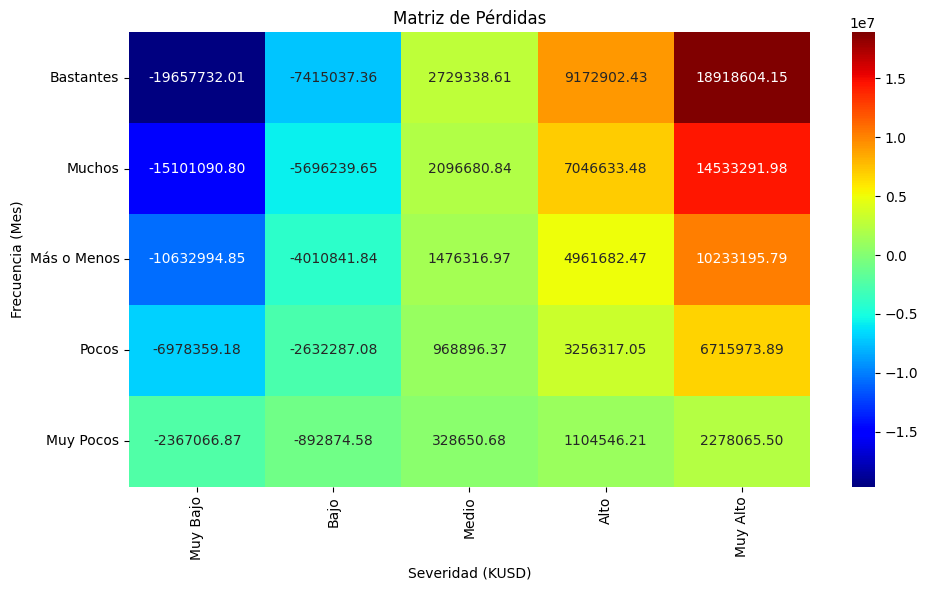

In [ ]:
MPo = matriz_perdidas(XCfo, XCso, lbfo, lbso, mostrar_grafica=True)

##4. Proceso de Gestión de las Pérdidas - Datos Originales

**Función Gestión de las Pérdidas**

In [ ]:
def gestion(XDB, XCf, XCs, lbf, lbs, sigmaf, sigmas, x):
  dff=pd.DataFrame(XDB[:,0])
  dfs=pd.DataFrame(XDB[:,1])

  #Definimos lbf_ordenada y MP según la función matriz_perdidas
  lbf_ordenada, MP = matriz_perdidas(XCf, XCs, lbf, lbs, mostrar_grafica= False)

  MP_ordenada= MP[::-1,:] #Inversión Vertical

  Xf=np.array(dff.sample(n=100))
  Xs=np.array(dfs.sample(n=100))

  MI=np.array([[1,1,1,2,2],
               [1,2,2,3,3],
               [1,2,3,3,4],
               [2,3,3,4,4],
               [2,3,4,4,5]])

  #Matriz de Gestión
  NG= x
  MG=MI.astype(float).copy()
  MG[(MG > 1) & (MG < 5)] *= NG #Yo solamente gestiono riesgo a partir del nivel 3 (Mucho Apetito al Riesgo)
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas
  # Primer heatmap
  sns.heatmap(MI, annot=True, cmap='jet', fmt='.2f', ax=axes[0])
  axes[0].set_title('Matriz de Impacto')
  axes[0].set_ylabel('Frecuencia')
  axes[0].set_xlabel('Severidad')
  axes[0].set_yticks(np.arange(len(lbf_ordenada)) + 0.5)
  axes[0].set_yticklabels(lbf_ordenada)
  axes[0].set_xticks(np.arange(len(lbs)) + 0.5)
  axes[0].set_xticklabels(lbs, rotation=90)

  # Segundo heatmap
  sns.heatmap(MG, annot=True, cmap='jet', fmt='.2f', ax=axes[1])
  axes[1].set_title('Matriz de Gestion')
  axes[1].set_ylabel('Frecuencia')
  axes[1].set_xlabel('Severidad')
  axes[1].set_yticks(np.arange(len(lbf_ordenada)) + 0.5)
  axes[1].set_yticklabels(lbf_ordenada)
  axes[1].set_xticks(np.arange(len(lbs)) + 0.5)
  axes[1].set_xticklabels(lbs, rotation=90)

  plt.tight_layout()
  plt.show()

  #Se procede con la construcción de la distribución agregada
  LDAo=np.array(Xf*Xs)
  LDAm=np.zeros((len(LDAo)))

  #Se procede con la estimacion de las pérdidas utilizando el modelo borroso
  for k in range(len(LDAo)):
    #print(Xf[k,],Xs[k,])
    VPf=np.exp(-0.5*((XCf-Xf[k,])/sigmaf)**2)
    VPs=np.exp(-0.5*((XCs-Xs[k,])/sigmas)**2)
    MB=np.outer(VPf, VPs);MB=np.outer(VPf, VPs)

    #Se procede a determinar los mayores valores de pértenencia
    VMB=np.array(sorted(MB.flatten(),reverse=True))
    MT=np.zeros((5,5))

    for i in range(4):
      MT[np.where(MB==VMB[i])]=1

    LDAm[k,]=np.sum(MB*MP*MT*MI)/np.sum(MB*MT*MG)

  plt.figure()
  sns.kdeplot(x=LDAo.flatten(),fill=True,color='red',label='LDAo')
  sns.kdeplot(x=LDAm.flatten(),fill=True,color='green',label='LDAm')
  plt.legend()
  plt.grid()
  plt.show()

  #Indicadores

  return LDAo, LDAm

**Función Indicadores**

In [ ]:
def indicadores(LDAo, LDAm):
    #Calculamos indicadores para LDAo (datos originales)
    indicadores_o = pd.Series(LDAo.flatten()).describe().to_dict()  # Aplana LDAo
    asimetria_o = skew(LDAo.flatten())  # Aplana LDAo
    opvar_999_o = np.percentile(LDAo.flatten(), 99.9)  # Aplana LDAo

    # Calcula indicadores para LDAm (datos gestionados)
    indicadores_m = pd.Series(LDAm.flatten()).describe().to_dict()  # Aplana LDAm
    asimetria_m = skew(LDAm.flatten())  # Aplana LDAm
    opvar_999_m = np.percentile(LDAm.flatten(), 99.9)  # Aplana LDAm

    # Crea diccionarios de indicadores para originales y gestionados
    indicadores_originales = {
        'Count': indicadores_o['count'],
        'Mean/Pérdidas Esperadas': indicadores_o['mean'],
        'Std': indicadores_o['std'],
        'Min': indicadores_o['min'],
        '25%': indicadores_o['25%'],
        '50%': indicadores_o['50%'],
        '75%': indicadores_o['75%'],
        'Max': indicadores_o['max'],
        'Asimetría': asimetria_o,
        'OpVar/Pérdidas Catastróficas': opvar_999_o,
        'Pérdidas No Esperadas': (indicadores_o['mean'] + opvar_999_o) / 2
    }

    indicadores_gestionados = {
        'Count': indicadores_m['count'],
        'Mean/Pérdidas Esperadas': indicadores_m['mean'],
        'Std': indicadores_m['std'],
        'Min': indicadores_m['min'],
        '25%': indicadores_m['25%'],
        '50%': indicadores_m['50%'],
        '75%': indicadores_m['75%'],
        'Max': indicadores_m['max'],
        'Asimetría': asimetria_m,
        'OpVar/Pérdidas Catastróficas': opvar_999_m,
        'Pérdidas No Esperadas': (indicadores_m['mean'] + opvar_999_m) / 2
    }

    return indicadores_originales, indicadores_gestionados

###4.1. Nivel de Gestión 1

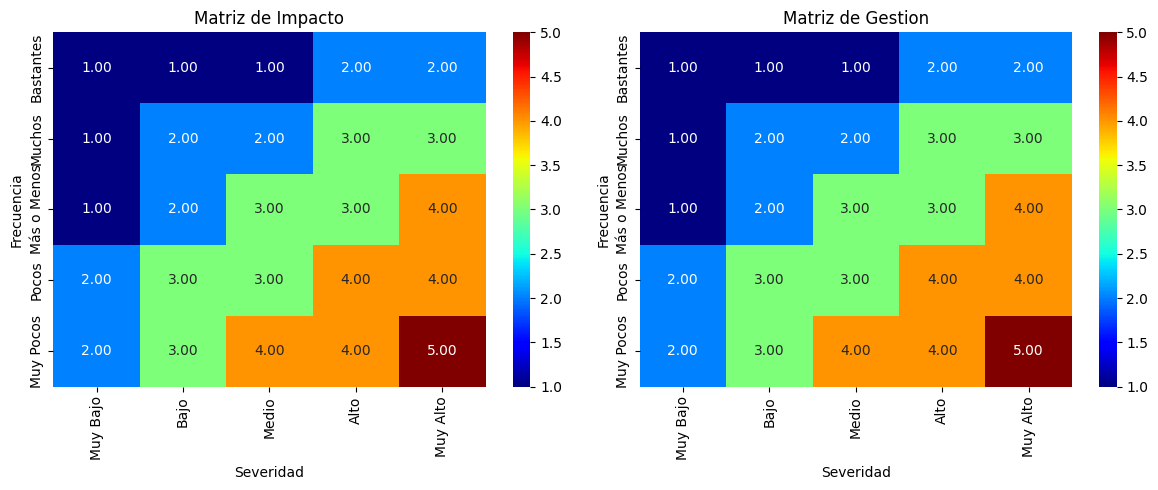

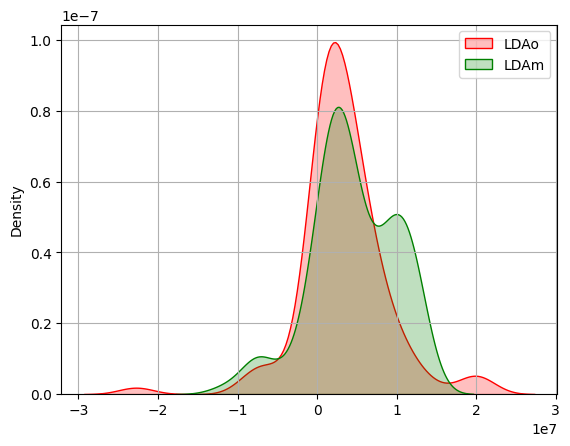

In [ ]:
#Gestión de las Pérdidas
LDAo, LDAm= gestion(XDBo, XCfo, XCso, lbfo, lbso, sigmafo, sigmaso, 1)

In [ ]:
#Indicadores
indicadores_originales_g1, indicadores_gestionados_g1 = indicadores(LDAo, LDAm)

df_indicadores1= pd.DataFrame([indicadores_originales_g1,indicadores_gestionados_g1],index=['LDAo1','LDAm1'])
df_indicadores1

,Count,Mean/Pérdidas Esperadas,Std,Min,25%,50%,75%,Max,Asimetría,OpVar/Pérdidas Catastróficas,Pérdidas No Esperadas
LDAo1,100.0,3.211370e+06,5.501887e+06,-2.274392e+07,5.922090e+05,2.741834e+06,5.115627e+06,2.078578e+07,-0.294512,2.071380e+07,1.196259e+07
LDAm1,100.0,4.469307e+06,5.318937e+06,-1.147270e+07,1.555922e+06,3.936757e+06,8.897664e+06,1.329660e+07,-0.439607,1.324502e+07,8.857161e+06


###4.2. Nivel de Gestión 2

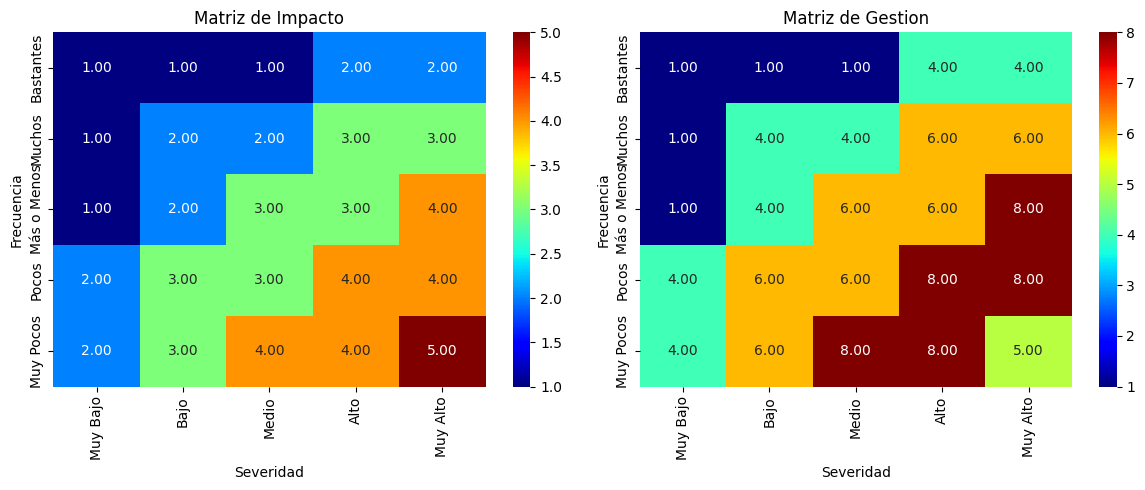

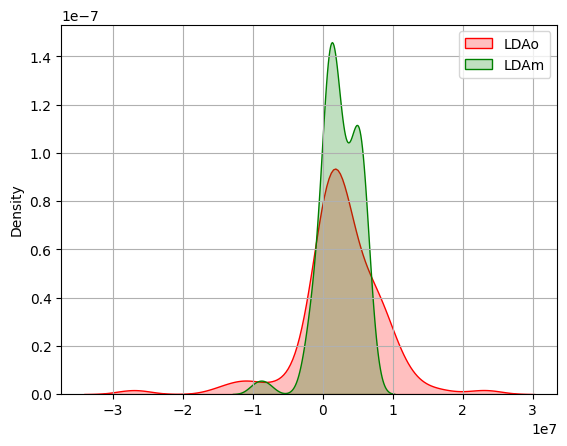

In [ ]:
#Gestión de las Pérdidas
LDAo_g2, LDAm_g2 = gestion(XDBo, XCfo, XCso, lbfo, lbso, sigmafo, sigmaso, 2)

In [ ]:
#Indicadores
indicadores_originales_g2, indicadores_gestionados_g2 = indicadores(LDAo_g2, LDAm_g2)

df_indicadores2= pd.DataFrame([indicadores_originales_g2,indicadores_gestionados_g2],index=['LDAo2','LDAm2'])
df_indicadores2

,Count,Mean/Pérdidas Esperadas,Std,Min,25%,50%,75%,Max,Asimetría,OpVar/Pérdidas Catastróficas,Pérdidas No Esperadas
LDAo2,100.0,2.542085e+06,6.007779e+06,-2.702345e+07,316636.212080,2.179244e+06,5.741389e+06,2.312081e+07,-1.091957,2.244424e+07,1.249316e+07
LDAm2,100.0,2.323695e+06,2.825424e+06,-9.588310e+06,735635.472645,1.988572e+06,4.695727e+06,6.889737e+06,-1.093718,6.886715e+06,4.605205e+06


###4.3. Nivel de Gestión 3

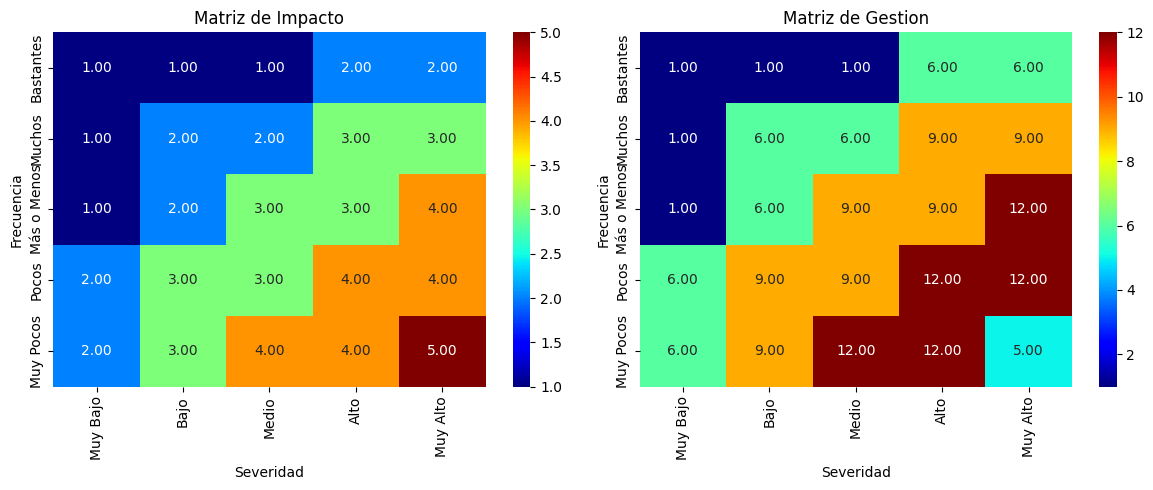

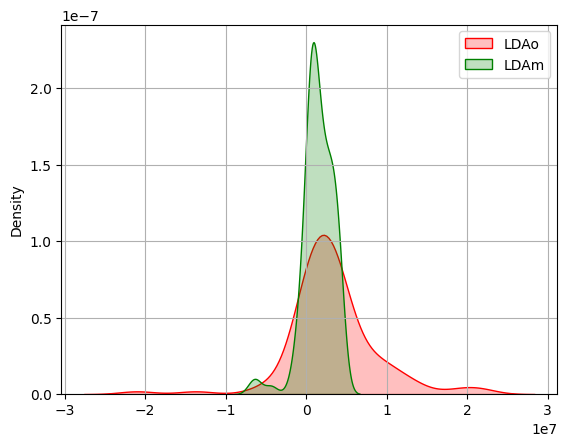

In [ ]:
#Gestión de las Pérdidas
LDAo_g3, LDAm_g3 = gestion(XDBo, XCfo, XCso, lbfo, lbso, sigmafo, sigmaso, 3)

In [ ]:
#Indicadores
indicadores_originales_g3, indicadores_gestionados_g3 = indicadores(LDAo_g3, LDAm_g3)

df_indicadores3= pd.DataFrame([indicadores_originales_g3,indicadores_gestionados_g3],index=['LDAo3','LDAm3'])
df_indicadores3

,Count,Mean/Pérdidas Esperadas,Std,Min,25%,50%,75%,Max,Asimetría,OpVar/Pérdidas Catastróficas,Pérdidas No Esperadas
LDAo3,100.0,3.209576e+06,5.522493e+06,-2.101653e+07,451205.512083,2.828504e+06,4.465998e+06,2.178651e+07,-0.043138,2.166294e+07,1.243626e+07
LDAm3,100.0,1.431127e+06,1.932567e+06,-6.645678e+06,488551.181206,1.348847e+06,2.874550e+06,4.340216e+06,-1.379031,4.335248e+06,2.883187e+06


###4.4. Nivel de Gestión 4

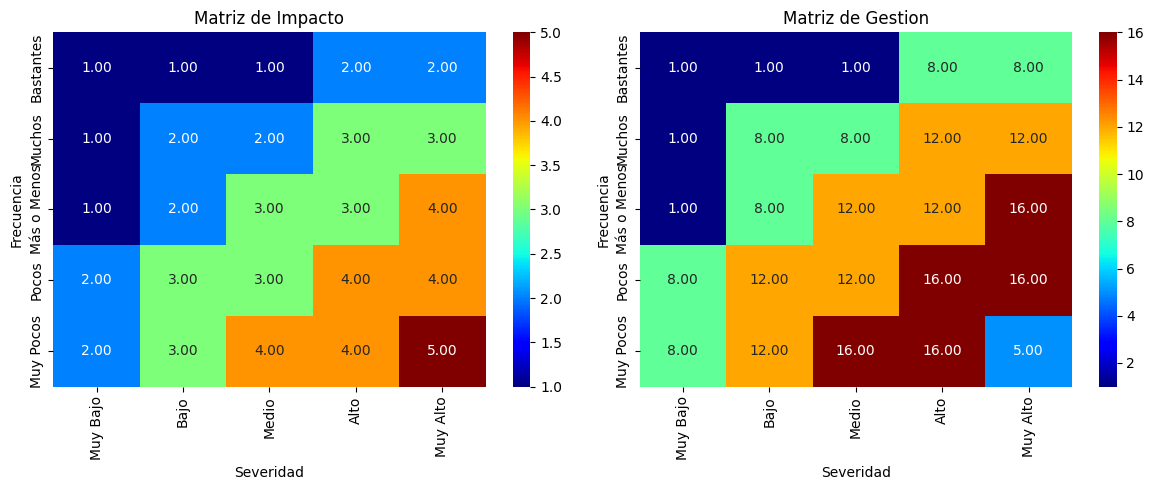

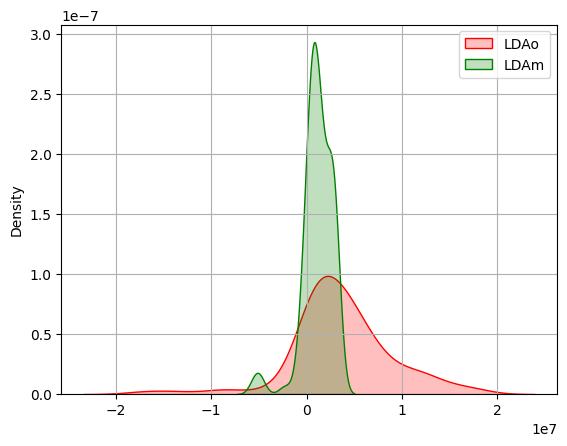

In [ ]:
#Gestión de las Pérdidas
LDAo_g4, LDAm_g4 = gestion(XDBo, XCfo, XCso, lbfo, lbso, sigmafo, sigmaso, 4)

In [ ]:
#Indicadores
indicadores_originales_g4, indicadores_gestionados_g4 = indicadores(LDAo_g4, LDAm_g4)

df_indicadores4= pd.DataFrame([indicadores_originales_g4,indicadores_gestionados_g4],index=['LDAo4','LDAm4'])
df_indicadores4

,Count,Mean/Pérdidas Esperadas,Std,Min,25%,50%,75%,Max,Asimetría,OpVar/Pérdidas Catastróficas,Pérdidas No Esperadas
LDAo4,100.0,3.586953e+06,5.304064e+06,-1.702477e+07,956062.820957,2.971230e+06,5.548795e+06,1.760497e+07,-0.426720,1.755276e+07,1.056986e+07
LDAm4,100.0,1.129592e+06,1.578180e+06,-5.445826e+06,378940.987384,1.032434e+06,2.292875e+06,3.138296e+06,-1.770999,3.136329e+06,2.132960e+06


**Concatenamos los Resultados de los Indicadores**

In [ ]:
indicadores = pd.concat([df_indicadores1,df_indicadores2,df_indicadores3,df_indicadores4])
indicadores

,Count,Mean/Pérdidas Esperadas,Std,Min,25%,50%,75%,Max,Asimetría,OpVar/Pérdidas Catastróficas,Pérdidas No Esperadas
LDAo1,100.0,3.211370e+06,5.501887e+06,-2.274392e+07,5.922090e+05,2.741834e+06,5.115627e+06,2.078578e+07,-0.294512,2.071380e+07,1.196259e+07
LDAm1,100.0,4.469307e+06,5.318937e+06,-1.147270e+07,1.555922e+06,3.936757e+06,8.897664e+06,1.329660e+07,-0.439607,1.324502e+07,8.857161e+06
LDAo2,100.0,2.542085e+06,6.007779e+06,-2.702345e+07,3.166362e+05,2.179244e+06,5.741389e+06,2.312081e+07,-1.091957,2.244424e+07,1.249316e+07
LDAm2,100.0,2.323695e+06,2.825424e+06,-9.588310e+06,7.356355e+05,1.988572e+06,4.695727e+06,6.889737e+06,-1.093718,6.886715e+06,4.605205e+06
LDAo3,100.0,3.209576e+06,5.522493e+06,-2.101653e+07,4.512055e+05,2.828504e+06,4.465998e+06,2.178651e+07,-0.043138,2.166294e+07,1.243626e+07
LDAm3,100.0,1.431127e+06,1.932567e+06,-6.645678e+06,4.885512e+05,1.348847e+06,2.874550e+06,4.340216e+06,-1.379031,4.335248e+06,2.883187e+06
LDAo4,100.0,3.586953e+06,5.304064e+06,-1.702477e+07,9.560628e+05,2.971230e+06,5.548795e+06,1.760497e+07,-0.426720,1.755276e+07,1.056986e+07
LDAm4,100.0,1.129592e+06,1.578180e+06,-5.445826e+06,3.789410e+05,1.032434e+06,2.292875e+06,3.138296e+06,-1.770999,3.136329e+06,2.132960e+06


LDAo - Datos Originales

LDAm - Gestionados

In [ ]:
#Exportamos a Excel
indicadores.to_excel('Indicadores.xlsx')

##5. Análisis de Resultados - Parte 1

De acuerdo con las matrices de gestión e impacto implementadas para la mitigación de los riesgos en las operaciones de la empresa del sector palmero, para la **gestión 1:1**, se evidencia un incremento de las pérdidas esperadas (3,211.370 a 4,469.307). Por otro lado, a pesar de que ocurrió una disminución en el OpVar (20,713.803 a 13,245.015) y las pérdidas no esperadas (11,962.587 a 8,857.161), el aumento del coeficiente de asimetría (-0.294 a -0.439) y al ser este un valor negativo, implica que después de aplicar la gestión, nos encontraremos con que las pérdidas van a ser más grandes de lo que solían ser. En fin, este escenario sugiere un **aumento generalizado de riesgo.**

Ahora, la **gestión 1:2** demostró una disminución en las pérdidas esperadas (de 2,542,085 a 2,323,695), así como una reducción significativa en el OpVar (de 22,444,237 a 6,886,715) y las pérdidas no esperadas (de 12,498,161 a 4,605,205). El coeficiente de asimetría se mantuvo relativamente estable (-1.092 a -1.094), lo que sugiere que la probabilidad relativa de ocurrencia de pérdidas de mayor magnitud se mantiene similar a la situación original, aunque el nivel general de las pérdidas haya disminuido. En general, se puede decir qué ocurrió una **disminución generalizada del riesgo.**

Para la **gestión 1:3**, se observó una disminución considerable de las pérdidas esperadas (3,209.576 a 1,431.127), el OpVar (21,662.940 a 4,335.248) y las pérdidas no esperadas (12,436.258 a 2,883.187). Sin embargo, el aumento en la magnitud del coeficiente negativo de asimetría (-0.043 a -1.379) implica que, a pesar de la reducción general en las pérdidas, después de aplicar esta gestión, es más probable que las pérdidas que ocurran sean de una magnitud mayor en comparación con los datos originales. Por ende se podría decir que si bien existió una **disminución del nivel general de pérdidas, hay una mayor probabilidad de que las pérdidas sean mayores.**

Por último, para la **gestión 1:4** se evidenció la mayor disminución en las pérdidas esperadas (3,586.953 a 1,129.592), el OpVar (17.552.757 a 3,136.329) y las pérdidas no esperadas (10,569.855 a 2,132.960). El aumento significativo en la magnitud del coeficiente de asimetría negativa (-0.427 a -1.771) indica que, si bien se logra una reducción sustancial en el nivel general de las pérdidas, y es por eso que podría ocurrir lo mismo que en la gestión 1:3, es decir, una **disminución del nivel general de pérdidas, hay una mayor probabilidad de que las pérdidas sean mayores.**

Asimismo, notamos que con base a las gráficas, el **LDAm se vuelve más esbelta** (verde) con el aumento del número de gestión.

##6. Integración Basada en Lógica Borrosa

In [ ]:
Xfe1=np.array(XDBe1[:,0]); Xse1=np.array(XDBe1[:,1])
Xfe2=np.array(XDBe2[:,0]); Xse2=np.array(XDBe2[:,1])
Xfe3=np.array(XDBe3[:,0]); Xse3=np.array(XDBe3[:,1])
Xfe4=np.array(XDBe4[:,0]); Xse4=np.array(XDBe4[:,1])

**Se procede con la Integración de los Datos Externos - Función de Integración**

In [ ]:
def integracion(XCf, XCs, sigmaf, sigmas, LDAo, Xfe, Xse):
  LDAe=[]; m1 = 0 #distribucion de perdidas externa
  #para todos los datos disponibles
  for k in range(len(Xfe)):
    VPf=np.exp(-0.5*((XCf-Xfe[k,])/sigmaf)**2)
    VPs=np.exp(-0.5*((XCs-Xse[k,])/sigmas)**2)
    VPmax=np.max(VPf)*np.max(VPs)

    if VPmax>0.99:
     m1+=1
     #print('Se procede con la integracion del registro:\n',k)
     LDAe.append(Xfe[k,]*Xse[k,])

  #la LDA de integracion es la siguiente
  LDAe=np.array(LDAe).reshape(-1,1)#solo datos integrados
  LDAint=np.vstack((LDAo, LDAe))#base de datos de integracion
  LDAe=Xfe*Xse #base de datos externa

  #Se procede con las gráficas
  plt.figure()
  sns.kdeplot(x=LDAo.flatten(),fill=True,color='red',label='LDAo')
  sns.kdeplot(x=LDAe.flatten(),fill=True,color='blue',label='LDAe')
  sns.kdeplot(x=LDAint.flatten(),fill=True,color='green',label='LDAint')
  plt.legend()
  plt.grid()
  plt.show()

  return LDAe, LDAint, m1

**Función Indicadores de los Datos Integrados**

In [ ]:
def indicadores_integrados(LDAo, LDAe, LDAint, nombre_finca):
  #Datos Originales
  mo = np.array(pd.DataFrame(LDAo).describe())
  mo = np.vstack((mo, skew(LDAo))); mo= np.vstack((mo, np.percentile(LDAo, 0.999))); mo = np.vstack((mo, (mo[1,]+mo[9,])/2))

  #Datos Externos
  me = np.array(pd.DataFrame(LDAe).describe())
  me = np.vstack((me, skew(LDAe))); me= np.vstack((me, np.percentile(LDAe, 0.999))); me = np.vstack((me, (me[1,]+me[9,])/2))

  #Datos Integrados
  mint = np.array(pd.DataFrame(LDAint).describe())
  mint = np.vstack((mint, skew(LDAint))); mint= np.vstack((mint, np.percentile(LDAint, 0.999))); mint = np.vstack((mint, (mint[1,]+mint[9,])/2))

  dfe = pd.DataFrame(np.row_stack((mo.T, me.T, mint.T)))
  dfe.columns = ['Count', 'Mean/Pérdidas Esperadas', 'Std', 'Min', '25%', '50%', '75%', 'Max', 'Asimetría', 'OpVar/Pérdidas Catastróficas', 'Pérdidas No Esperadas']
  dfe.index = ['LDAo', f'LDAe_{nombre_finca}', f'LDAint_{nombre_finca}']
  display(dfe)

  return dfe

###**6.1. Finca 1**

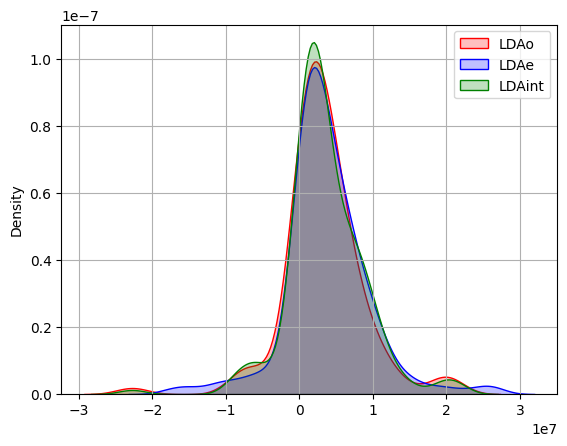

Los datos integrados de la finca 1 fueron: 72


In [ ]:
LDAe1, LDAint1, m1_1= integracion(XCfo, XCso, sigmafo, sigmaso, LDAo, Xfe1, Xse1)

print("Los datos integrados de la finca 1 fueron:", m1_1)

In [ ]:
finca1 = indicadores_integrados(LDAo, LDAe1, LDAint1, 'Finca1');

,Count,Mean/Pérdidas Esperadas,Std,Min,25%,50%,75%,Max,Asimetría,OpVar/Pérdidas Catastróficas,Pérdidas No Esperadas
LDAo,100.0,3.211370e+06,5.501887e+06,-2.274392e+07,592209.044860,2.741834e+06,5.115627e+06,2.078578e+07,-0.294512,-8.464051e+06,-2.626340e+06
LDAe_Finca1,235.0,3.648873e+06,5.724705e+06,-1.751341e+07,772228.285460,2.927232e+06,6.046484e+06,2.625595e+07,0.348014,-1.345314e+07,-4.902132e+06
LDAint_Finca1,172.0,3.481871e+06,5.282263e+06,-2.274392e+07,806625.829471,2.741834e+06,6.502915e+06,2.140407e+07,-0.052111,-8.385950e+06,-2.452039e+06


La integración externa de 72 datos, alteró el coeficiente de asimetría (-0.29 a 0.35) y aumentó las pérdidas esperadas (3.21e+06 a 3.65e+06), con un OpVar ligeramente menos negativo (de -8.464051e+06	 a --8.385950e+06). Con respecto a la gráfica podemos ver que la distribución de las pérdidas son muy parejas, lo que se ve reflejado en los indicadores.

###**6.2. Finca 2**

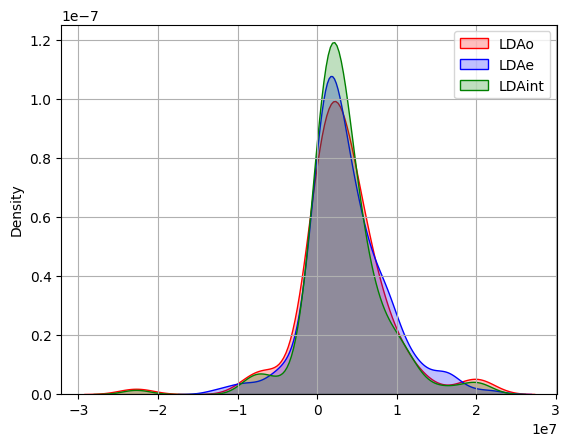

Los datos integrados de la finca 2 fueron: 55


In [ ]:
LDAe2, LDAint2, m1_2 = integracion(XCfo, XCso, sigmafo, sigmaso, LDAo, Xfe2, Xse2)

print("Los datos integrados de la finca 2 fueron:", m1_2)

In [ ]:
finca2 = indicadores_integrados(LDAo, LDAe2, LDAint2, 'Finca2')

,Count,Mean/Pérdidas Esperadas,Std,Min,25%,50%,75%,Max,Asimetría,OpVar/Pérdidas Catastróficas,Pérdidas No Esperadas
LDAo,100.0,3.211370e+06,5.501887e+06,-2.274392e+07,5.922090e+05,2.741834e+06,5.115627e+06,2.078578e+07,-0.294512,-8.464051e+06,-2.626340e+06
LDAe_Finca2,235.0,3.632319e+06,4.906541e+06,-1.261729e+07,9.656508e+05,2.756978e+06,5.916430e+06,2.201084e+07,0.490024,-9.251752e+06,-2.809717e+06
LDAint_Finca2,155.0,3.190077e+06,4.933620e+06,-2.274392e+07,1.019026e+06,2.710815e+06,4.948784e+06,2.078578e+07,-0.118628,-8.154803e+06,-2.482363e+06


La integración externa de 55 datos, modificó la forma de las pérdidas (-0.29 a 0.49) y elevó ligeramente las pérdidas esperadas a 3.63e+06. Es decir, hubo cambios leves en las pérdidas esperadas con un OpVar ligeramente menos negativo (de -8.464051e+06 a -8.154803e+06). Por su parte en la gráfica, notamos datos cercanos, pero con mayor diferencia entre los integrados y los originales que en la finca 1.

###**6.3. Finca 3**

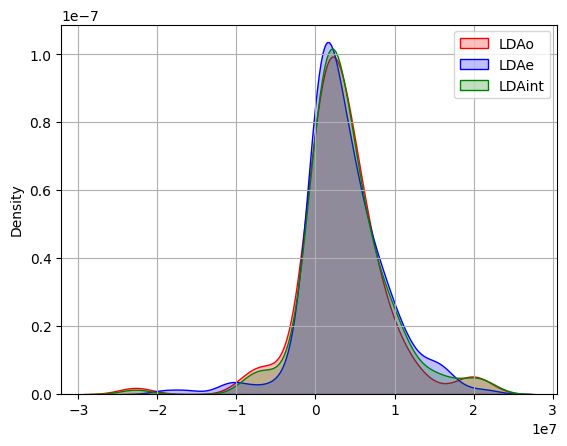

Los datos integrados de la finca 3 fueron: 55


In [ ]:
LDAe3, LDAint3, m1_3 = integracion(XCfo, XCso, sigmafo, sigmaso, LDAo, Xfe3, Xse3)

print("Los datos integrados de la finca 3 fueron:", m1_3)

In [ ]:
finca3 = indicadores_integrados(LDAo, LDAe3, LDAint3, 'Finca3')

,Count,Mean/Pérdidas Esperadas,Std,Min,25%,50%,75%,Max,Asimetría,OpVar/Pérdidas Catastróficas,Pérdidas No Esperadas
LDAo,100.0,3.211370e+06,5.501887e+06,-2.274392e+07,592209.044860,2.741834e+06,5.115627e+06,2.078578e+07,-0.294512,-8.464051e+06,-2.626340e+06
LDAe_Finca3,235.0,3.617979e+06,5.209696e+06,-1.917631e+07,724538.054499,2.819920e+06,6.120545e+06,2.181272e+07,-0.056044,-1.098608e+07,-3.684050e+06
LDAint_Finca3,155.0,3.675288e+06,5.422523e+06,-2.274392e+07,955524.760990,2.961798e+06,5.970211e+06,2.181272e+07,0.094380,-8.154803e+06,-2.239758e+06


La integración externa de 55 datos, cambió la asimetría de -0.29 a -0.06, hacia una distribución más simétrica y aumentó las pérdidas esperadas (3.53e+06), con un OpVar ligeramente menos negativo (-1.48e+10). Con respecto a la gráfica, notamos que los datos son mucho más cercanos que aquellos en las primeras dos fincas.

###**6.4. Finca 4**

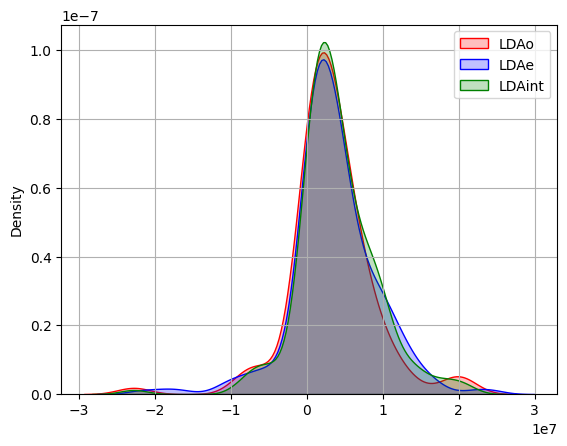

Los datos integrados de la finca 4 fueron: 81


In [ ]:
LDAe4, LDAint4, m1_4 = integracion(XCfo, XCso, sigmafo, sigmaso, LDAo, Xfe4, Xse4)

print("Los datos integrados de la finca 4 fueron:", m1_4)

In [ ]:
finca4 = indicadores_integrados(LDAo, LDAe4, LDAint4, 'Finca4')

,Count,Mean/Pérdidas Esperadas,Std,Min,25%,50%,75%,Max,Asimetría,OpVar/Pérdidas Catastróficas,Pérdidas No Esperadas
LDAo,100.0,3.211370e+06,5.501887e+06,-2.274392e+07,5.922090e+05,2.741834e+06,5.115627e+06,2.078578e+07,-0.294512,-8.464051e+06,-2.626340e+06
LDAe_Finca4,235.0,3.531558e+06,5.660343e+06,-2.190503e+07,7.749090e+05,3.085774e+06,6.190589e+06,2.432527e+07,-0.373578,-1.478638e+07,-5.627413e+06
LDAint_Finca4,181.0,3.899508e+06,5.203004e+06,-2.274392e+07,1.149401e+06,3.167938e+06,6.525252e+06,2.078578e+07,-0.124650,-8.082173e+06,-2.091332e+06


La integración externa de 81 datos, modificó ligeramente la asimetría (-0.29 a -0.37), aumentó las pérdidas esperadas a 3.53e+06, y resultó en un OpVar menos negativo (-$1.48e+10). Sin embargo, en esta integración obtuvimos el OpVar más negativo de todos los escenarios integrados. La gráfica por su parte, mostró una distribución muy pareja como la de la finca 3.

**Concatenamos los Resultados de los Indicadores de los Datos Integrados**

In [ ]:
indicadores_integrados = pd.concat([finca1,finca2,finca3,finca4])
indicadores_integrados

,Count,Mean/Pérdidas Esperadas,Std,Min,25%,50%,75%,Max,Asimetría,OpVar/Pérdidas Catastróficas,Pérdidas No Esperadas
LDAo,100.0,3.211370e+06,5.501887e+06,-2.274392e+07,5.922090e+05,2.741834e+06,5.115627e+06,2.078578e+07,-0.294512,-8.464051e+06,-2.626340e+06
LDAe_Finca1,235.0,3.648873e+06,5.724705e+06,-1.751341e+07,7.722283e+05,2.927232e+06,6.046484e+06,2.625595e+07,0.348014,-1.345314e+07,-4.902132e+06
LDAint_Finca1,172.0,3.481871e+06,5.282263e+06,-2.274392e+07,8.066258e+05,2.741834e+06,6.502915e+06,2.140407e+07,-0.052111,-8.385950e+06,-2.452039e+06
LDAo,100.0,3.211370e+06,5.501887e+06,-2.274392e+07,5.922090e+05,2.741834e+06,5.115627e+06,2.078578e+07,-0.294512,-8.464051e+06,-2.626340e+06
LDAe_Finca2,235.0,3.632319e+06,4.906541e+06,-1.261729e+07,9.656508e+05,2.756978e+06,5.916430e+06,2.201084e+07,0.490024,-9.251752e+06,-2.809717e+06
LDAint_Finca2,155.0,3.190077e+06,4.933620e+06,-2.274392e+07,1.019026e+06,2.710815e+06,4.948784e+06,2.078578e+07,-0.118628,-8.154803e+06,-2.482363e+06
LDAo,100.0,3.211370e+06,5.501887e+06,-2.274392e+07,5.922090e+05,2.741834e+06,5.115627e+06,2.078578e+07,-0.294512,-8.464051e+06,-2.626340e+06
LDAe_Finca3,235.0,3.617979e+06,5.209696e+06,-1.917631e+07,7.245381e+05,2.819920e+06,6.120545e+06,2.181272e+07,-0.056044,-1.098608e+07,-3.684050e+06
LDAint_Finca3,155.0,3.675288e+06,5.422523e+06,-2.274392e+07,9.555248e+05,2.961798e+06,5.970211e+06,2.181272e+07,0.094380,-8.154803e+06,-2.239758e+06
LDAo,100.0,3.211370e+06,5.501887e+06,-2.274392e+07,5.922090e+05,2.741834e+06,5.115627e+06,2.078578e+07,-0.294512,-8.464051e+06,-2.626340e+06


In [ ]:
#Exportamos a Excel
indicadores_integrados.to_excel('Indicadores_Integrados.xlsx')

##7. Análisis de Resultados - Parte 2

En conclusión general, la integración de datos externos consistentemente generó cambios más significativos en el coeficiente de asimetría y tendió a aumentar las pérdidas esperadas en todas las fincas analizadas. Además, el OpVar generalmente se volvió menos negativo con la integración externa de las fincas.